In [1]:
#import libraries

import numpy as np
import pandas as pd
import pymysql
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sb
sb.set_style("darkgrid")

## Read Countries file

In [2]:
#open countries file and create a dataframe

countries = pd.read_csv("NATMON_COUNTRY.csv")
countries_df = pd.DataFrame(countries) 
countries_df.rename(columns= {"COUNTRY_ID": "country_id", "COUNTRY_NAME_EN":"country"}, inplace= True)
countries_df.head()

,country_id,country
0,AFG,Afghanistan
1,ALB,Albania
2,DZA,Algeria
3,ASM,American Samoa
4,AND,Andorra


## Create Class

In [3]:
#create class for processing dataframes


class GetData:
    def __init__(self):
        self.host = "localhost"
        self.user = "hildred"
        self.password = "Hildred_28"
        self.db = "unesco"

    def connect(self):
        self.con = pymysql.connect(host=self.host, user=self.user, password=self.password, db=self.db)
        self.cur = self.con.cursor()

    def disconnect(self):
        self.con.close()

    def fetch(self, query):
        self.connect()
        self.cur.execute(query)
        result = self.cur.fetchall()
        self.disconnect()
        return result
  
    def getDataframe(self, query, names):
        data = self.fetch(query)
        frame = pd.DataFrame(data)
        frameResult = frame
        
        for index in range(len(names)):
            name = names[index]
            frameResult = frameResult.rename(columns = {index: str(name)})
        
        return frameResult
    
    
    def createTag(self, dataFrame):
        data_frame_name = dataFrame
        data_frame_name["year"]= data_frame_name["year"].astype("string")
        data_frame_name["tag"] = data_frame_name.country_id + " " + data_frame_name.year
        return data_frame_name
    
    def mergeCols(self, df1, df2, How):
        first_dataframe = df1
        second_dataframe = df2
        merge_format = "{}".format(How)
        merge = df1.merge(df2, how = merge_format)
        return merge
    
    def popCols(self, dataFrame):
        df = dataFrame
        df.pop("tag")
        df.pop("country_id") 
        return df
    

In [4]:
## Create class object
getData = GetData()

## Preprimary Data

In [5]:
#get preprimary data from mysql database

sql = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Preprimary enrolment(total)' AND year > '2009' """
data = getData.getDataframe(sql, ["country_id", "year", "total prepry enrol."])

#create unique 'tag' identifier
total_prepry = getData.createTag(data)
total_prepry.head()

,country_id,year,total prepry enrol.,tag
0,ABW,2010,2809,ABW 2010
1,ABW,2011,2782,ABW 2011
2,ABW,2012,2874,ABW 2012
3,ABW,2013,2822,ABW 2013
4,ABW,2014,2811,ABW 2014


In [6]:
total_prepry.shape

(1415, 4)

In [7]:
total_prepry.duplicated().sum()

0

In [8]:
sql2 = """SELECT country_id, year,value FROM total_education_records WHERE indicator = 'Preprimary enrolment(female)' AND year > '2009' """
data = getData.getDataframe(sql2, ["country_id", "year", "female prepry enrol."])
female_prepry = getData.createTag(data)
female_prepry.head()

,country_id,year,female prepry enrol.,tag
0,ABW,2010,1352,ABW 2010
1,ABW,2011,1383,ABW 2011
2,ABW,2012,1398,ABW 2012
3,ABW,2013,1366,ABW 2013
4,ABW,2014,1362,ABW 2014


In [9]:
female_prepry.shape

(1398, 4)

In [10]:
female_prepry.duplicated().sum()

0

In [11]:
# merge total preprimary and female preprimary dataframes on unique identifier column

first_merge = getData.mergeCols(total_prepry, female_prepry, "left")
first_merge.head()

,country_id,year,total prepry enrol.,tag,female prepry enrol.
0,ABW,2010,2809,ABW 2010,1352.0
1,ABW,2011,2782,ABW 2011,1383.0
2,ABW,2012,2874,ABW 2012,1398.0
3,ABW,2013,2822,ABW 2013,1366.0
4,ABW,2014,2811,ABW 2014,1362.0


In [12]:
first_merge.shape

(1415, 5)

In [13]:
# query database for preprimary teachers data and create unique 'tag' identifier

sql3 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Preprimary teachers(total)' AND year > '2009' """
data = getData.getDataframe(sql3, ["country_id", "year", "total prepry teachers."])
total_prepry_teachers = getData.createTag(data)
total_prepry_teachers.head()

,country_id,year,total prepry teachers.,tag
0,ABW,2010,144,ABW 2010
1,ABW,2011,147,ABW 2011
2,ABW,2012,147,ABW 2012
3,AGO,2010,18032,AGO 2010
4,AGO,2011,18894,AGO 2011


In [14]:
total_prepry_teachers.shape

(1114, 4)

In [15]:
total_prepry_teachers.duplicated().sum()

0

In [16]:
#perform inner join of total preprimary teachers to previous dataframe

second_merge = getData.mergeCols(first_merge, total_prepry_teachers, "inner")
second_merge.head()

,country_id,year,total prepry enrol.,tag,female prepry enrol.,total prepry teachers.
0,ABW,2010,2809,ABW 2010,1352.0,144
1,ABW,2011,2782,ABW 2011,1383.0,147
2,ABW,2012,2874,ABW 2012,1398.0,147
3,AGO,2010,668358,AGO 2010,336176.0,18032
4,AGO,2011,595938,AGO 2011,353621.0,18894


In [17]:
second_merge.shape

(1075, 6)

In [18]:
sql4 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Preprimary teachers(female)' AND year > '2009' """
data = getData.getDataframe(sql4, ["country_id", "year", "female prepry teachers."])
female_prepry_teachers = getData.createTag(data)
female_prepry_teachers.head()

,country_id,year,female prepry teachers.,tag
0,ABW,2010,141,ABW 2010
1,ABW,2011,144,ABW 2011
2,ABW,2012,144,ABW 2012
3,AGO,2010,7296,AGO 2010
4,AGO,2011,7645,AGO 2011


In [19]:
female_prepry_teachers.shape

(1082, 4)

In [20]:
female_prepry_teachers.duplicated().sum()

0

In [21]:
# #perform left join of total preprimary teachers to previous dataframe

third_merge = getData.mergeCols(second_merge, female_prepry_teachers, "left")
third_merge.head()

,country_id,year,total prepry enrol.,tag,female prepry enrol.,total prepry teachers.,female prepry teachers.
0,ABW,2010,2809,ABW 2010,1352.0,144,141.0
1,ABW,2011,2782,ABW 2011,1383.0,147,144.0
2,ABW,2012,2874,ABW 2012,1398.0,147,144.0
3,AGO,2010,668358,AGO 2010,336176.0,18032,7296.0
4,AGO,2011,595938,AGO 2011,353621.0,18894,7645.0


In [22]:
third_merge.shape

(1075, 7)

In [23]:
#merge country dataframe with preprimary dataframe 

ctry_merge = third_merge.merge(countries_df) 
third_merge.insert(0, "countries", ctry_merge.country)
third_merge.head()

,countries,country_id,year,total prepry enrol.,tag,female prepry enrol.,total prepry teachers.,female prepry teachers.
0,Aruba,ABW,2010,2809,ABW 2010,1352.0,144,141.0
1,Aruba,ABW,2011,2782,ABW 2011,1383.0,147,144.0
2,Aruba,ABW,2012,2874,ABW 2012,1398.0,147,144.0
3,Angola,AGO,2010,668358,AGO 2010,336176.0,18032,7296.0
4,Angola,AGO,2011,595938,AGO 2011,353621.0,18894,7645.0


In [24]:
#delete country_id and tag columns after use

prepry_df = getData.popCols(third_merge)
prepry_df.head()

,countries,year,total prepry enrol.,female prepry enrol.,total prepry teachers.,female prepry teachers.
0,Aruba,2010,2809,1352.0,144,141.0
1,Aruba,2011,2782,1383.0,147,144.0
2,Aruba,2012,2874,1398.0,147,144.0
3,Angola,2010,668358,336176.0,18032,7296.0
4,Angola,2011,595938,353621.0,18894,7645.0


## Primary Data

In [25]:
#query database and create unique 'tag' identifier

sql = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Primary enrolment(total)' AND year > '2009' """
data = getData.getDataframe(sql, ["country_id", "year", "total pry enrol."])
total_pry = getData.createTag(data)
total_pry.head()

,country_id,year,total pry enrol.,tag
0,ABW,2010,9858,ABW 2010
1,ABW,2011,9112,ABW 2011
2,ABW,2012,8888,ABW 2012
3,ABW,2013,9803,ABW 2013
4,ABW,2014,9816,ABW 2014


In [26]:
total_pry.shape

(1605, 4)

In [27]:
total_pry.duplicated().sum()

0

In [28]:
#query database and create unique 'tag' identifier

sql2 = """SELECT country_id, year,value FROM total_education_records WHERE indicator = 'Primary enrolment(female)' AND year > '2009' """
data = getData.getDataframe(sql2, ["country_id", "year", "female pry enrol."])
female_pry = getData.createTag(data)
female_pry.head()

,country_id,year,female pry enrol.,tag
0,ABW,2010,4821,ABW 2010
1,ABW,2011,4407,ABW 2011
2,ABW,2012,4409,ABW 2012
3,ABW,2013,4744,ABW 2013
4,ABW,2014,4728,ABW 2014


In [29]:
female_pry.shape

(1603, 4)

In [30]:
female_pry.duplicated().sum()

0

In [31]:
# left join dataframes from initial 2 queries

first_merge = getData.mergeCols(total_pry, female_pry, "left")
first_merge.head()

,country_id,year,total pry enrol.,tag,female pry enrol.
0,ABW,2010,9858,ABW 2010,4821.0
1,ABW,2011,9112,ABW 2011,4407.0
2,ABW,2012,8888,ABW 2012,4409.0
3,ABW,2013,9803,ABW 2013,4744.0
4,ABW,2014,9816,ABW 2014,4728.0


In [32]:
first_merge.shape

(1605, 5)

In [33]:
#query database

sql3 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Primary teachers(total)' AND year > '2009' """
data = getData.getDataframe(sql3, ["country_id", "year", "total pry teachers."])
total_pry_teachers = getData.createTag(data)
total_pry_teachers.head()

,country_id,year,total pry teachers.,tag
0,ABW,2010,586,ABW 2010
1,ABW,2011,604,ABW 2011
2,ABW,2012,601,ABW 2012
3,AFG,2010,118858,AFG 2010
4,AFG,2011,121593,AFG 2011


In [34]:
total_pry_teachers.shape

(1391, 4)

In [35]:
total_pry_teachers.duplicated().sum()

0

In [36]:
#inner join of new query dataframe to previous dataframe

second_merge = getData.mergeCols(first_merge, total_pry_teachers, "inner")
second_merge.head()

,country_id,year,total pry enrol.,tag,female pry enrol.,total pry teachers.
0,ABW,2010,9858,ABW 2010,4821.0,586
1,ABW,2011,9112,ABW 2011,4407.0,604
2,ABW,2012,8888,ABW 2012,4409.0,601
3,AFG,2010,5279326,AFG 2010,2076942.0,118858
4,AFG,2011,5291624,AFG 2011,2141833.0,121593


In [37]:
second_merge.shape

(1358, 6)

In [38]:
#query database and create tag

sql4 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Primary teachers(female)' AND year > '2009' """
data = getData.getDataframe(sql4, ["country_id", "year", "female pry teachers."])
female_pry_teachers = getData.createTag(data)
female_pry_teachers.head()

,country_id,year,female pry teachers.,tag
0,ABW,2010,493,ABW 2010
1,ABW,2011,512,ABW 2011
2,ABW,2012,508,ABW 2012
3,AFG,2010,36846,AFG 2010
4,AFG,2011,37694,AFG 2011


In [39]:
female_pry_teachers.shape

(1349, 4)

In [40]:
female_pry_teachers.duplicated().sum()

0

In [41]:
#left join female primary teachers on primary dataframe

third_merge = getData.mergeCols(second_merge, female_pry_teachers, "left")
third_merge.head()

,country_id,year,total pry enrol.,tag,female pry enrol.,total pry teachers.,female pry teachers.
0,ABW,2010,9858,ABW 2010,4821.0,586,493.0
1,ABW,2011,9112,ABW 2011,4407.0,604,512.0
2,ABW,2012,8888,ABW 2012,4409.0,601,508.0
3,AFG,2010,5279326,AFG 2010,2076942.0,118858,36846.0
4,AFG,2011,5291624,AFG 2011,2141833.0,121593,37694.0


In [42]:
#merge country columns and primary column

ctry_merge = third_merge.merge(countries_df) 
third_merge.insert(0, "countries", ctry_merge.country)
third_merge.head()

,countries,country_id,year,total pry enrol.,tag,female pry enrol.,total pry teachers.,female pry teachers.
0,Aruba,ABW,2010,9858,ABW 2010,4821.0,586,493.0
1,Aruba,ABW,2011,9112,ABW 2011,4407.0,604,512.0
2,Aruba,ABW,2012,8888,ABW 2012,4409.0,601,508.0
3,Afghanistan,AFG,2010,5279326,AFG 2010,2076942.0,118858,36846.0
4,Afghanistan,AFG,2011,5291624,AFG 2011,2141833.0,121593,37694.0


In [43]:
#pop country_id and tag columns

pry_df = getData.popCols(third_merge)
pry_df.head()

,countries,year,total pry enrol.,female pry enrol.,total pry teachers.,female pry teachers.
0,Aruba,2010,9858,4821.0,586,493.0
1,Aruba,2011,9112,4407.0,604,512.0
2,Aruba,2012,8888,4409.0,601,508.0
3,Afghanistan,2010,5279326,2076942.0,118858,36846.0
4,Afghanistan,2011,5291624,2141833.0,121593,37694.0


## Secondary Data

In [44]:
#query database for total lower secondary data and create unique 'tag' identifier

sql = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Lower secondary enrolment(total)' AND year > '2009' """
data = getData.getDataframe(sql, ["country_id", "year", "total lower sec enrol."])
total_Lsec = getData.createTag(data)
total_Lsec.head()

,country_id,year,total lower sec enrol.,tag
0,ABW,2010,3429,ABW 2010
1,ABW,2011,3408,ABW 2011
2,ABW,2012,3536,ABW 2012
3,AFG,2010,1476813,AFG 2010
4,AFG,2011,1465558,AFG 2011


In [45]:
total_Lsec.shape

(1523, 4)

In [46]:
#confirm there are no duplicate values

total_Lsec.duplicated().sum()

0

In [47]:
#query database for female lower secondary data and create unique 'tag' identifier


sql2 = """SELECT country_id, year,value FROM total_education_records WHERE indicator = 'Lower secondary enrolment(female)' AND year > '2009' """
data = getData.getDataframe(sql2, ["country_id", "year", "female lower sec enrol."])
female_Lsec  = getData.createTag(data)
female_Lsec .head()

,country_id,year,female lower sec enrol.,tag
0,ABW,2010,1632,ABW 2010
1,ABW,2011,1643,ABW 2011
2,ABW,2012,1769,ABW 2012
3,AFG,2010,494882,AFG 2010
4,AFG,2011,513320,AFG 2011


In [48]:
female_Lsec.shape

(1513, 4)

In [49]:
#confirm there are no duplicate values

female_Lsec.duplicated().sum()

0

In [50]:
#merge secondary female lower secondary enrolment data with left join

first_merge = getData.mergeCols(total_Lsec, female_Lsec, "left")
first_merge.head()

,country_id,year,total lower sec enrol.,tag,female lower sec enrol.
0,ABW,2010,3429,ABW 2010,1632.0
1,ABW,2011,3408,ABW 2011,1643.0
2,ABW,2012,3536,ABW 2012,1769.0
3,AFG,2010,1476813,AFG 2010,494882.0
4,AFG,2011,1465558,AFG 2011,513320.0


In [51]:
first_merge.shape

(1523, 5)

In [52]:
#query database for total upper secondary data and create unique 'tag' identifier


sql3 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Upper secondary enrolment(total)' AND year > '2009' """
data = getData.getDataframe(sql3, ["country_id", "year", "total upper sec enrol."])
total_Usec = getData.createTag(data)
total_Usec.head()

,country_id,year,total upper sec enrol.,tag
0,ABW,2010,3913,ABW 2010
1,ABW,2011,3970,ABW 2011
2,ABW,2012,4841,ABW 2012
3,AFG,2010,567344,AFG 2010
4,AFG,2011,743405,AFG 2011


In [53]:
## left join total upper sec data to lower secondary enrolment data 

second_merge = getData.mergeCols(first_merge, total_Usec, "left")
second_merge.head()

,country_id,year,total lower sec enrol.,tag,female lower sec enrol.,total upper sec enrol.
0,ABW,2010,3429,ABW 2010,1632.0,3913.0
1,ABW,2011,3408,ABW 2011,1643.0,3970.0
2,ABW,2012,3536,ABW 2012,1769.0,4841.0
3,AFG,2010,1476813,AFG 2010,494882.0,567344.0
4,AFG,2011,1465558,AFG 2011,513320.0,743405.0


In [54]:
#query database for female upper secondary data and create unique 'tag' identifier


sql4 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Upper secondary enrolment(female)' AND year > '2009' """
data = getData.getDataframe(sql4, ["country_id", "year", "female upper sec enrol."])
female_Usec = getData.createTag(data)
female_Usec.head()

,country_id,year,female upper sec enrol.,tag
0,ABW,2010,2056,ABW 2010
1,ABW,2011,2069,ABW 2011
2,ABW,2012,2386,ABW 2012
3,AFG,2010,159425,AFG 2010
4,AFG,2011,247799,AFG 2011


In [55]:
#left join female upper secondary data to current secondary dataframe

third_merge = getData.mergeCols(second_merge, female_Usec, "left")
third_merge.head()

,country_id,year,total lower sec enrol.,tag,female lower sec enrol.,total upper sec enrol.,female upper sec enrol.
0,ABW,2010,3429,ABW 2010,1632.0,3913.0,2056.0
1,ABW,2011,3408,ABW 2011,1643.0,3970.0,2069.0
2,ABW,2012,3536,ABW 2012,1769.0,4841.0,2386.0
3,AFG,2010,1476813,AFG 2010,494882.0,567344.0,159425.0
4,AFG,2011,1465558,AFG 2011,513320.0,743405.0,247799.0


In [56]:
third_merge.shape

(1523, 7)

In [57]:
#query database for total lower secondary teachers data and create 'tag' unique identifier

sql5 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Lower secondary teachers(total)' AND year > '2009' """
data = getData.getDataframe(sql5, ["country_id", "year", "total lower sec teachers."])
total_Lsec_teachers = getData.createTag(data)
total_Lsec_teachers.head()

,country_id,year,total lower sec teachers.,tag
0,AFG,2010,33856,AFG 2010
1,AFG,2011,34247,AFG 2011
2,AFG,2012,34990,AFG 2012
3,AFG,2015,52359,AFG 2015
4,AFG,2016,53490,AFG 2016


In [58]:
total_Lsec_teachers.shape

(931, 4)

In [59]:
# merge lower secondary teachers data to current secondary dataframe using inner join

fourth_merge = getData.mergeCols(third_merge, total_Lsec_teachers, "inner")
fourth_merge.head()

,country_id,year,total lower sec enrol.,tag,female lower sec enrol.,total upper sec enrol.,female upper sec enrol.,total lower sec teachers.
0,AFG,2010,1476813,AFG 2010,494882.0,567344.0,159425.0,33856
1,AFG,2011,1465558,AFG 2011,513320.0,743405.0,247799.0,34247
2,AFG,2012,1534469,AFG 2012,541033.0,881415.0,295594.0,34990
3,AFG,2015,1669168,AFG 2015,596476.0,982291.0,323429.0,52359
4,AFG,2016,1740873,AFG 2016,624167.0,984548.0,334818.0,53490


In [60]:
fourth_merge.shape

(901, 8)

In [61]:
#query database for female lower secondary teachers data and create 'tag' unique identifier

sql6 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Lower secondary teachers(female)' AND year > '2009' """
data = getData.getDataframe(sql6, ["country_id", "year", "female lower sec teachers."])
female_Lsec_teachers = getData.createTag(data)
female_Lsec_teachers.head()

,country_id,year,female lower sec teachers.,tag
0,AFG,2010,10495,AFG 2010
1,AFG,2011,10617,AFG 2011
2,AFG,2012,10847,AFG 2012
3,AFG,2015,17368,AFG 2015
4,AFG,2016,18370,AFG 2016


In [62]:
# merge female lower secondary teachers data to current secondary dataframe using inner join

fifth_merge = getData.mergeCols(fourth_merge, female_Lsec_teachers, "left")
fifth_merge.head()

,country_id,year,total lower sec enrol.,tag,female lower sec enrol.,total upper sec enrol.,female upper sec enrol.,total lower sec teachers.,female lower sec teachers.
0,AFG,2010,1476813,AFG 2010,494882.0,567344.0,159425.0,33856,10495.0
1,AFG,2011,1465558,AFG 2011,513320.0,743405.0,247799.0,34247,10617.0
2,AFG,2012,1534469,AFG 2012,541033.0,881415.0,295594.0,34990,10847.0
3,AFG,2015,1669168,AFG 2015,596476.0,982291.0,323429.0,52359,17368.0
4,AFG,2016,1740873,AFG 2016,624167.0,984548.0,334818.0,53490,18370.0


In [63]:
#query database for total upper secondary teachers data and create 'tag' unique identifier

sql7 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Upper secondary teachers(total)' AND year > '2009' """
data = getData.getDataframe(sql7, ["country_id", "year", "total upper sec teachers."])
total_Usec_teachers = getData.createTag(data)
total_Usec_teachers.head()

,country_id,year,total upper sec teachers.,tag
0,AFG,2015,30567,AFG 2015
1,AFG,2016,31129,AFG 2016
2,AFG,2017,32316,AFG 2017
3,AFG,2018,33600,AFG 2018
4,AGO,2011,14804,AGO 2011


In [64]:
total_Usec_teachers.shape

(875, 4)

In [65]:
#join total upper secondary teachers data to current sec dataframe using an inner join

sixth_merge = getData.mergeCols(fifth_merge, total_Usec_teachers, "inner")
sixth_merge.head()

,country_id,year,total lower sec enrol.,tag,female lower sec enrol.,total upper sec enrol.,female upper sec enrol.,total lower sec teachers.,female lower sec teachers.,total upper sec teachers.
0,AFG,2015,1669168,AFG 2015,596476.0,982291.0,323429.0,52359,17368.0,30567
1,AFG,2016,1740873,AFG 2016,624167.0,984548.0,334818.0,53490,18370.0,31129
2,AFG,2017,1867666,AFG 2017,668185.0,1031787.0,347607.0,55640,19331.0,32316
3,AFG,2018,1982869,AFG 2018,708606.0,1081020.0,367543.0,58539,21084.0,33600
4,AGO,2011,581414,AGO 2011,238973.0,303568.0,109953.0,17475,NaN,14804


In [66]:
sixth_merge.shape

(787, 10)

In [67]:
#query database for female upper secondary teachers data and create 'tag' unique identifier

sql8 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Upper secondary teachers(female)' AND year > '2009' """
data = getData.getDataframe(sql8, ["country_id", "year", "female upper sec teachers."])
female_Usec_teachers = getData.createTag(data)
female_Usec_teachers.head()

,country_id,year,female upper sec teachers.,tag
0,AFG,2015,10019,AFG 2015
1,AFG,2016,10561,AFG 2016
2,AFG,2017,10890,AFG 2017
3,AFG,2018,11745,AFG 2018
4,AGO,2011,7114,AGO 2011


In [68]:
female_Usec_teachers.shape

(851, 4)

In [69]:
#join female upper secondary teachers data to current sec dataframe using a left join

seventh_merge = getData.mergeCols(sixth_merge, female_Usec_teachers, "left")
seventh_merge.head()

,country_id,year,total lower sec enrol.,tag,female lower sec enrol.,total upper sec enrol.,female upper sec enrol.,total lower sec teachers.,female lower sec teachers.,total upper sec teachers.,female upper sec teachers.
0,AFG,2015,1669168,AFG 2015,596476.0,982291.0,323429.0,52359,17368.0,30567,10019.0
1,AFG,2016,1740873,AFG 2016,624167.0,984548.0,334818.0,53490,18370.0,31129,10561.0
2,AFG,2017,1867666,AFG 2017,668185.0,1031787.0,347607.0,55640,19331.0,32316,10890.0
3,AFG,2018,1982869,AFG 2018,708606.0,1081020.0,367543.0,58539,21084.0,33600,11745.0
4,AGO,2011,581414,AGO 2011,238973.0,303568.0,109953.0,17475,NaN,14804,7114.0


In [70]:
#merge secondary df and countries column on country_id

ctry_merge = seventh_merge.merge(countries_df) 
seventh_merge.insert(0, "countries", ctry_merge.country)
seventh_merge.head()

,countries,country_id,year,total lower sec enrol.,tag,female lower sec enrol.,total upper sec enrol.,female upper sec enrol.,total lower sec teachers.,female lower sec teachers.,total upper sec teachers.,female upper sec teachers.
0,Afghanistan,AFG,2015,1669168,AFG 2015,596476.0,982291.0,323429.0,52359,17368.0,30567,10019.0
1,Afghanistan,AFG,2016,1740873,AFG 2016,624167.0,984548.0,334818.0,53490,18370.0,31129,10561.0
2,Afghanistan,AFG,2017,1867666,AFG 2017,668185.0,1031787.0,347607.0,55640,19331.0,32316,10890.0
3,Afghanistan,AFG,2018,1982869,AFG 2018,708606.0,1081020.0,367543.0,58539,21084.0,33600,11745.0
4,Angola,AGO,2011,581414,AGO 2011,238973.0,303568.0,109953.0,17475,NaN,14804,7114.0


In [71]:
#pop country_id and tag columns

sec_df = getData.popCols(seventh_merge)
sec_df.head()

,countries,year,total lower sec enrol.,female lower sec enrol.,total upper sec enrol.,female upper sec enrol.,total lower sec teachers.,female lower sec teachers.,total upper sec teachers.,female upper sec teachers.
0,Afghanistan,2015,1669168,596476.0,982291.0,323429.0,52359,17368.0,30567,10019.0
1,Afghanistan,2016,1740873,624167.0,984548.0,334818.0,53490,18370.0,31129,10561.0
2,Afghanistan,2017,1867666,668185.0,1031787.0,347607.0,55640,19331.0,32316,10890.0
3,Afghanistan,2018,1982869,708606.0,1081020.0,367543.0,58539,21084.0,33600,11745.0
4,Angola,2011,581414,238973.0,303568.0,109953.0,17475,NaN,14804,7114.0


## Tertiary Data

In [72]:
# query database for total tertiary enrolment data and create unique 'tag' identifier

sql = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Tertiary enrolment(total)' AND year > '2009' """
data = getData.getDataframe(sql, ["country_id", "year", "total tertiary enrol."])
total_tert = getData.createTag(data)
total_tert.head()

,country_id,year,total tertiary enrol.,tag
0,ABW,2010,2330,ABW 2010
1,ABW,2011,2504,ABW 2011
2,ABW,2012,2621,ABW 2012
3,ABW,2013,1181,ABW 2013
4,ABW,2014,1235,ABW 2014


In [73]:
total_tert.shape

(1269, 4)

In [74]:
# query database for female tertiary enrolment data and create unique 'tag' identifier

sql2 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Tertiary enrolment(female)' AND year > '2009' """
data = getData.getDataframe(sql2, ["country_id", "year", "female tertiary enrol."])
female_tert = getData.createTag(data)
female_tert.head()

,country_id,year,female tertiary enrol.,tag
0,ABW,2010,1333,ABW 2010
1,ABW,2011,1453,ABW 2011
2,ABW,2012,1523,ABW 2012
3,ABW,2013,795,ABW 2013
4,ABW,2014,842,ABW 2014


In [75]:
female_tert.shape

(1242, 4)

In [76]:
#left join female tertiary enrolment to total tert enrolment

merge = getData.mergeCols(total_tert, female_tert, "left")
merge.head()

,country_id,year,total tertiary enrol.,tag,female tertiary enrol.
0,ABW,2010,2330,ABW 2010,1333.0
1,ABW,2011,2504,ABW 2011,1453.0
2,ABW,2012,2621,ABW 2012,1523.0
3,ABW,2013,1181,ABW 2013,795.0
4,ABW,2014,1235,ABW 2014,842.0


In [77]:
merge.shape

(1269, 5)

In [78]:
# query database for total tertiary teachers data and create unique 'tag' identifier

sql3 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Tertiary teachers(total)' AND year > '2009' """
data = getData.getDataframe(sql3, ["country_id", "year", "total tertiary teachers."])
tert_teachers = getData.createTag(data)
tert_teachers.head()

,country_id,year,total tertiary teachers.,tag
0,ABW,2010,224,ABW 2010
1,ABW,2011,228,ABW 2011
2,ABW,2012,265,ABW 2012
3,ABW,2013,114,ABW 2013
4,ABW,2014,116,ABW 2014


In [79]:
tert_teachers.shape

(956, 4)

In [80]:
#inner join total tertiary teachers to current tertiary dataframe

second_merge = getData.mergeCols(merge, tert_teachers, "inner")
second_merge.head()

,country_id,year,total tertiary enrol.,tag,female tertiary enrol.,total tertiary teachers.
0,ABW,2010,2330,ABW 2010,1333.0,224
1,ABW,2011,2504,ABW 2011,1453.0,228
2,ABW,2012,2621,ABW 2012,1523.0,265
3,ABW,2013,1181,ABW 2013,795.0,114
4,ABW,2014,1235,ABW 2014,842.0,116


In [81]:
second_merge.shape

(937, 6)

In [82]:
# query database for female tertiary teachers data and create unique 'tag' identifier

sql4 = """SELECT country_id, year, value FROM total_education_records WHERE indicator = 'Tertiary teachers(female)' AND year > '2009' """
data = getData.getDataframe(sql4, ["country_id", "year", "female tertiary teachers."])
female_tert_teachers = getData.createTag(data)
female_tert_teachers.head()

,country_id,year,female tertiary teachers.,tag
0,ABW,2010,120,ABW 2010
1,ABW,2011,123,ABW 2011
2,ABW,2012,141,ABW 2012
3,ABW,2013,61,ABW 2013
4,ABW,2014,63,ABW 2014


In [83]:
female_tert_teachers.shape

(888, 4)

In [84]:
#inner join female tertiary teachers to current tertiary dataframe

third_merge = getData.mergeCols(second_merge, female_tert_teachers, "left")
third_merge.head()

,country_id,year,total tertiary enrol.,tag,female tertiary enrol.,total tertiary teachers.,female tertiary teachers.
0,ABW,2010,2330,ABW 2010,1333.0,224,120.0
1,ABW,2011,2504,ABW 2011,1453.0,228,123.0
2,ABW,2012,2621,ABW 2012,1523.0,265,141.0
3,ABW,2013,1181,ABW 2013,795.0,114,61.0
4,ABW,2014,1235,ABW 2014,842.0,116,63.0


In [85]:
third_merge.shape

(937, 7)

In [86]:
#merge country column to tertiary dataframe

ctry_merge = third_merge.merge(countries_df) 
third_merge.insert(0, "countries", ctry_merge.country)
third_merge.head()

,countries,country_id,year,total tertiary enrol.,tag,female tertiary enrol.,total tertiary teachers.,female tertiary teachers.
0,Aruba,ABW,2010,2330,ABW 2010,1333.0,224,120.0
1,Aruba,ABW,2011,2504,ABW 2011,1453.0,228,123.0
2,Aruba,ABW,2012,2621,ABW 2012,1523.0,265,141.0
3,Aruba,ABW,2013,1181,ABW 2013,795.0,114,61.0
4,Aruba,ABW,2014,1235,ABW 2014,842.0,116,63.0


In [87]:
#pop country_id and tag columns

tertiary_df = getData.popCols(third_merge)
tertiary_df.head()

,countries,year,total tertiary enrol.,female tertiary enrol.,total tertiary teachers.,female tertiary teachers.
0,Aruba,2010,2330,1333.0,224,120.0
1,Aruba,2011,2504,1453.0,228,123.0
2,Aruba,2012,2621,1523.0,265,141.0
3,Aruba,2013,1181,795.0,114,61.0
4,Aruba,2014,1235,842.0,116,63.0


# DATA DESCRIPTION

In [88]:
prepry_df.describe()

,total prepry enrol.,female prepry enrol.,total prepry teachers.,female prepry teachers.
count,1.075000e+03,1.063000e+03,1.075000e+03,1.043000e+03
mean,8.700903e+05,4.080507e+05,4.695767e+04,4.502480e+04
std,4.066117e+06,1.907419e+06,2.066674e+05,2.036175e+05
min,2.700000e+01,1.500000e+01,5.000000e+00,5.000000e+00
25%,2.283550e+04,1.108650e+04,1.456500e+03,1.344000e+03
50%,1.207150e+05,5.779700e+04,7.598000e+03,7.054000e+03
75%,4.412380e+05,2.096985e+05,2.493450e+04,2.228050e+04
max,4.656420e+07,2.176703e+07,2.786176e+06,2.712445e+06


### Inferences:
####  1.  The total average number of enrolled preprimary pupils across all countries is about 870,000 strudents
####  2.  The standard deviation of the total value, infers a widely distributed dataset
####  3.  The smallest number of total preprimary enrolled pupils in the dataset is 27 pupils as opposed to the largest number of enrolled pupils which is 46,564,200 pupils
####  4.  The  average number of enrolled female preprimary pupils across all countries is about 400,000 pupils

In [89]:
pry_df.describe()

,total pry enrol.,female pry enrol.,total pry teachers.,female pry teachers.
count,1.358000e+03,1.356000e+03,1.358000e+03,1.317000e+03
mean,3.661423e+06,1.760389e+06,1.608520e+05,1.020352e+05
std,1.341590e+07,6.487852e+06,6.178831e+05,3.789231e+05
min,1.670000e+02,8.000000e+01,1.200000e+01,1.100000e+01
25%,1.104205e+05,5.388300e+04,7.208250e+03,4.042000e+03
50%,5.554310e+05,2.717645e+05,3.341800e+04,1.992500e+04
75%,2.771758e+06,1.335399e+06,1.004775e+05,6.376700e+04
max,1.458025e+08,7.452686e+07,6.363952e+06,4.389406e+06


### Inferences:
####  1.  The total average number of enrolled primary pupils across all countries is 3,661,423 pupils
####  2.  The standard deviation of the total value, infers a widely distributed dataset
####  3.  The smallest number of total primary enrolled pupils in the dataset is 167 pupils as opposed to the largest number of enrolled pupils which is 145,802,500 pupils
####  4.  The  average number of enrolled female primary pupils across all countries is 1,760,389 pupils

In [90]:
sec_df.describe()

,total lower sec enrol.,female lower sec enrol.,total upper sec enrol.,female upper sec enrol.,total lower sec teachers.,female lower sec teachers.,total upper sec teachers.,female upper sec teachers.
count,7.870000e+02,7.860000e+02,7.700000e+02,7.690000e+02,7.870000e+02,7.640000e+02,7.870000e+02,7.640000e+02
mean,2.445544e+06,1.177315e+06,2.091023e+06,9.982911e+05,1.425800e+05,7.845282e+04,1.163405e+05,5.758664e+04
std,8.525367e+06,4.076768e+06,7.807454e+06,3.660422e+06,4.808743e+05,2.534040e+05,3.851687e+05,1.881376e+05
min,1.190000e+02,7.000000e+01,3.100000e+01,2.200000e+01,5.000000e+00,2.000000e+00,1.200000e+01,8.000000e+00
25%,5.831950e+04,2.893625e+04,6.046350e+04,2.849700e+04,4.649000e+03,1.950750e+03,4.390500e+03,1.469250e+03
50%,3.181640e+05,1.472215e+05,2.309040e+05,1.114930e+05,2.299600e+04,1.452700e+04,1.931300e+04,9.862000e+03
75%,1.201256e+06,5.793185e+05,9.495265e+05,4.614900e+05,6.627000e+04,3.135725e+04,5.346900e+04,2.709975e+04
max,6.686680e+07,3.255427e+07,6.675692e+07,3.132507e+07,3.711513e+06,2.115950e+06,2.883344e+06,1.490577e+06


### Inferences

####  1.  The total average number of enrolled lower secondary students across all countries is 2,445,544 students
####  2.  The standard deviation of the total enrolment values, infers a widely distributed dataset
####  3.  The smallest number of total enrolled lower secondary students in the dataset is 119 students as opposed to the largest number of enrolled students which is 66,866,800 students
####  4.  The  average number of enrolled female lower secondary students across all countries is 32,554,270 students
####  5.   The total average number of enrolled upper secondary students across all countries is 116,340 students
####  6.  The smallest number of total enrolled upper secondary students in the dataset is 12 students as opposed to the largest number of enrolled students which is 2,883,344 students
####  7.  The  average number of enrolled female upper secondary students across all countries is 57,586 students

In [91]:
tertiary_df.describe()

,total tertiary enrol.,female tertiary enrol.,total tertiary teachers.,female tertiary teachers.
count,9.370000e+02,9.200000e+02,9.370000e+02,871.000000
mean,1.139649e+06,5.865800e+05,6.902899e+04,27513.102181
std,3.540206e+06,1.774016e+06,1.871110e+05,83641.715386
min,1.000000e+02,7.500000e+01,4.900000e+01,17.000000
25%,6.349600e+04,2.759775e+04,3.464000e+03,792.500000
50%,2.013730e+05,1.019735e+05,1.392600e+04,5140.000000
75%,6.509050e+05,3.436405e+05,4.078700e+04,15477.500000
max,3.514812e+07,1.749324e+07,1.606554e+06,783887.000000


### Inferences:
####  1.  The total average number of enrolled tertiary students across all countries is 1,139,649 students
####  2.  The standard deviation of the total value, infers a widely distributed dataset
####  3.  The smallest number of total enrolled tertiary students in the dataset is 100 students as opposed to the largest number of enrolled students which is 35,148,120 students
####  4.  The  average number of enrolled female tertiary students across all countries is 586,580 strudents

# ANALYSIS

## PREPRIMARY

In [92]:
#create columns for male enrolment and male teachers in preprimary education

prepry_df.columns

Index(['countries', 'year', 'total prepry enrol.', 'female prepry enrol.',
       'total prepry teachers.', 'female prepry teachers.'],
      dtype='object')

In [93]:
prepry_df.insert(4, "male prepry enrol.", prepry_df.apply(lambda x: x[2] - x[3], axis = 1))
prepry_df.insert(7, "male prepry teachers.", prepry_df.apply(lambda x: x[-2] - x[-1], axis = 1))

In [94]:
prepry_df.tail()

,countries,year,total prepry enrol.,female prepry enrol.,male prepry enrol.,total prepry teachers.,female prepry teachers.,male prepry teachers.
1070,Yemen,2011,30137,13841.0,16296.0,1999,1949.0,50.0
1071,Yemen,2016,36320,16813.0,19507.0,1375,1338.0,37.0
1072,South Africa,2012,815935,405392.0,410543.0,24772,19566.0,5206.0
1073,Zimbabwe,2012,352946,177503.0,175443.0,10173,9495.0,678.0
1074,Zimbabwe,2013,374125,188568.0,185557.0,9992,9249.0,743.0


In [95]:
prepry_df.dtypes

countries                   object
year                        string
total prepry enrol.          int64
female prepry enrol.       float64
male prepry enrol.         float64
total prepry teachers.       int64
female prepry teachers.    float64
male prepry teachers.      float64
dtype: object

In [96]:
#check for null values created during joins

prepry_df.isnull().sum()

countries                   0
year                        0
total prepry enrol.         0
female prepry enrol.       12
male prepry enrol.         12
total prepry teachers.      0
female prepry teachers.    32
male prepry teachers.      32
dtype: int64

In [97]:
#fill null values with zero

prepry_df.fillna(0, inplace = True)

In [98]:
prepry_df.isnull().sum()

countries                  0
year                       0
total prepry enrol.        0
female prepry enrol.       0
male prepry enrol.         0
total prepry teachers.     0
female prepry teachers.    0
male prepry teachers.      0
dtype: int64

In [99]:
#convert year to appropriate datatype

prepry_df.year = pd.to_datetime(prepry_df['year'])

## Visualization per Country; preprimary data

In [100]:
#group preprimary dataframe by countries and aggregate sum of other columns

grp_countries = prepry_df.groupby("countries").agg(sum)
grp_countries.head()


,total prepry enrol.,female prepry enrol.,male prepry enrol.,total prepry teachers.,female prepry teachers.,male prepry teachers.
countries,,,,,,
Albania,801383,381161.0,420222.0,44867,44867.0,0.0
Algeria,990200,481458.0,508742.0,38706,28693.0,10013.0
Andorra,23459,11491.0,11968.0,1745,1607.0,138.0
Angola,2048677,1058109.0,990568.0,49366,20458.0,28908.0
Anguilla,1262,607.0,655.0,87,87.0,0.0


In [101]:
grp_countries.nsmallest(5, 'total prepry enrol.')

,total prepry enrol.,female prepry enrol.,male prepry enrol.,total prepry teachers.,female prepry teachers.,male prepry teachers.
countries,,,,,,
Niue,90,50.0,40.0,16,10.0,0.0
Tokelau,120,55.0,65.0,24,23.0,1.0
Montserrat,260,138.0,122.0,38,38.0,0.0
Palau,518,269.0,249.0,29,29.0,0.0
Cayman Islands,591,299.0,292.0,70,63.0,7.0


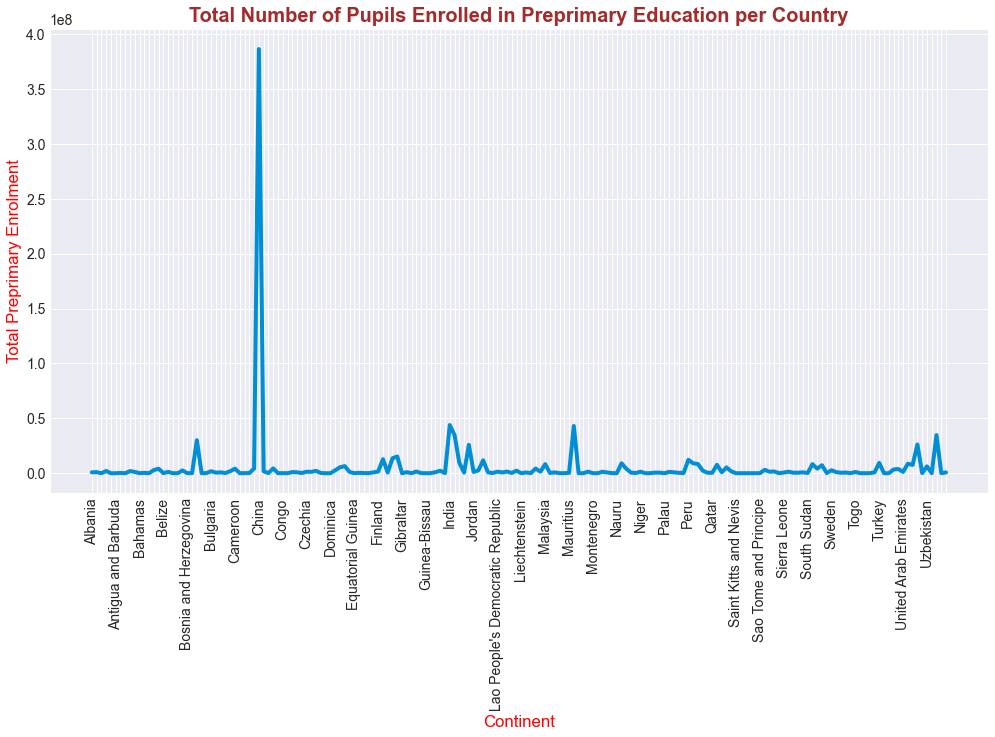

In [102]:
## Generate plot

plt.figure(figsize = (15,8))
plot = sb.lineplot(x = 'countries', y= 'total prepry enrol.', data = grp_countries)
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Continent", color = "r")
plot.set_ylabel("Total Preprimary Enrolment", color = "r")
plot.set_title("Total Number of Pupils Enrolled in Preprimary Education per Country", fontdict = {"fontsize": 20,"fontweight":"bold"}, color = 'brown')

#keep every 10th country label on xtick labels to create neat and spacious x-axis labeling

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0: 
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()

### Inference
##### The country with the highest preprimary enrolment rate is China, followed by India


## Visualization per continent (Preprimary)

### Create Countries Dictionary

In [103]:
#create lists containing countries corresponding to each continent/subcontinental area(Africa)

W_Africa = ['Benin', 'Burkina Faso', 'Cameroon', 'Cabo Verde', 'Chad', 'Côte d\'Ivoire', 'Equatorial Guinea', 
                'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 
                'Nigeria', 'Senegal', 'Sierra Leone','Togo','Gambia']
    

S_Africa = ['Angola', 'Botswana', 'Lesotho', 'Malawi', 'Mozambique', 'Namibia', 'South Africa', 'Swaziland', 
            'Zambia', 'Zimbabwe', 'Eswatini']
C_Africa = ['Central African Republic', 'Congo',
            'Democratic Republic of the Congo', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']

N_Africa = ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Western Sahara', 'South Sudan']

E_Africa = ['Burundi', 'Comoros', 'Djibouti', 'Ethiopia', 'Eritrea', 'Kenya', 'Madagascar', 'Malawi', 
            'Mauritius', 'Mozambique', 'Réunion', 'Rwanda', 'Seychelles', 'Somalia', 'Somaliland', 
            'United Republic of Tanzania','Uganda', 'Zambia', 'Zimbabwe']

Asia = ["Democratic People's Republic of Korea", "Russian Federation",'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain','Brunei Darussalam', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 
        'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region','East Timor', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 
        'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Mongolia', 'Nepal', 
        'North Korea', 'Oman', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
        'Singapore', 'South Korea', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan'
        ,'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen', 'Republic of Korea', 
        'Lao People\'s Democratic Republic', 'Maldives', 'Myanmar', 'Palestine', 'Timor-Leste', 'China', 'Iran (Islamic Republic of)']

Australia_Oceania = ["Marshall Islands","Fiji",'Australia', 'New Zealand', 'Papua New Guinea', 'Cook Islands', 'Micronesia (Federated States of)',
                    'Niue', 'Nauru', 'Palau', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu', 'Samoa', "Kiribati"]

Europe = ['Belarus','Andorra','Albania','Austria', 'Bosnia and Herzegovina', 'Italy', 'Belgium', 'Latvia', 
          'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus','Malta', 'Czechia', 'Netherlands', 'Denmark',
          'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 'Slovakia', 'Germany','Switzerland',
          'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'United Kingdom of Great Britain and Northern Ireland',
         'Gibraltar', 'Iceland', 'Liechtenstein', 'Monaco', 'Republic of Moldova', 'North Macedonia', 'Montenegro',
         'Norway', 'San Marino', 'Serbia', 'Ukraine', ]

South_America = ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
                 'Suriname', 'Uruguay', 'Venezuela']

North_America = ['Anguilla',  'Antigua and Barbuda', 'Aruba', 'Bahamas',  'Barbados',  'Belize', 'Bermuda', 
                 'British Virgin Islands', 'Canada', 'Cayman Islands', 'Costa Rica', 'Cuba', 'Dominica', 
                 'Dominican Republic', 'El Salvador','Greenland',  'Grenada', 'Guadeloupe', 'Guatemala', 'Haiti',
                 'Honduras', 'Jamaica', 'Martinique',  'Mexico', 'Montserrat', 'Navassa Island', 
                 'Netherlands Antilles', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis',
                 'Saint Lucia', 'Saint-Pierre and Miquelon', 'Saint Vincent and the Grenadines',
                'Trinidad and Tobago',  'Turks and Caicos Islands', 'United States of America', 
                 'United States Virgin Islands', 'El Salvador',"Sint Maarten (Dutch part)"]    



In [104]:
#create dictionaries from continental lists

W_Africa_dict = dict.fromkeys(W_Africa, "West Africa")
S_Africa_dict = dict.fromkeys(S_Africa, "South Africa")
N_Africa_dict = dict.fromkeys(N_Africa, "North Africa")
E_Africa_dict = dict.fromkeys(E_Africa, "East Africa")
C_Africa_dict = dict.fromkeys(C_Africa, "Central Africa")
Asia_dict = dict.fromkeys(Asia, "Asia")
Australia_dict = dict.fromkeys(Australia_Oceania, "Australia/Oceania")
Europe_dict = dict.fromkeys(Europe, "Europe")
South_America_dict = dict.fromkeys(South_America, "South America")
North_America_dict = dict.fromkeys(North_America, "North America")

In [105]:
##concatenate all dicts into one dict

countries_dict = W_Africa_dict.copy()
countries_dict.update(S_Africa_dict)
countries_dict.update(N_Africa_dict)
countries_dict.update(E_Africa_dict)
countries_dict.update(C_Africa_dict)
countries_dict.update(Asia_dict)
countries_dict.update(Australia_dict)
countries_dict.update(Europe_dict)
countries_dict.update(South_America_dict)
countries_dict.update(North_America_dict)


### Define Function

In [106]:
#define function to group countries into continents

def grpContinent(dic, dfCol):
    result = []
    for item in dfCol:
        if item in dic.keys():
            result.append(dic.get(item))
        else:
            result.append("NOT FOUND")
    return result
    

In [107]:
# call continental grouping function
prepry_df["continent"] = grpContinent(countries_dict, prepry_df.countries)
prepry_df.head()

,countries,year,total prepry enrol.,female prepry enrol.,male prepry enrol.,total prepry teachers.,female prepry teachers.,male prepry teachers.,continent
0,Aruba,2010-01-01,2809,1352.0,1457.0,144,141.0,3.0,North America
1,Aruba,2011-01-01,2782,1383.0,1399.0,147,144.0,3.0,North America
2,Aruba,2012-01-01,2874,1398.0,1476.0,147,144.0,3.0,North America
3,Angola,2010-01-01,668358,336176.0,332182.0,18032,7296.0,10736.0,South Africa
4,Angola,2011-01-01,595938,353621.0,242317.0,18894,7645.0,11249.0,South Africa


In [108]:
# obtain continental total enrolment figures in descending order
grpCont = prepry_df.groupby('continent').agg('sum').reset_index()
t_larg = grpCont.nlargest(9, 'total prepry enrol.')
t_larg

,continent,total prepry enrol.,female prepry enrol.,male prepry enrol.,total prepry teachers.,female prepry teachers.,male prepry teachers.
0,Asia,602530037,270364153.0,305705955.0,31195815,29139786.0,888181.0
4,Europe,106352687,51549712.0,54802975.0,8697406,8244812.0,342962.0
6,North America,78996214,38924092.0,40072122.0,4355886,4113455.0,242431.0
8,South America,59418103,29133881.0,30284222.0,3120933,2975871.0,138518.0
3,East Africa,32928049,16430563.0,16497486.0,1017926,831191.0,186735.0
9,West Africa,31094039,15517121.0,15576918.0,1128539,918731.0,172632.0
5,North Africa,16961195,8264794.0,8696401.0,677143,502447.0,52032.0
7,South Africa,3338391,1703211.0,1635180.0,101778,64825.0,34794.0
2,Central Africa,2372645,1212640.0,1160005.0,96543,90305.0,5794.0


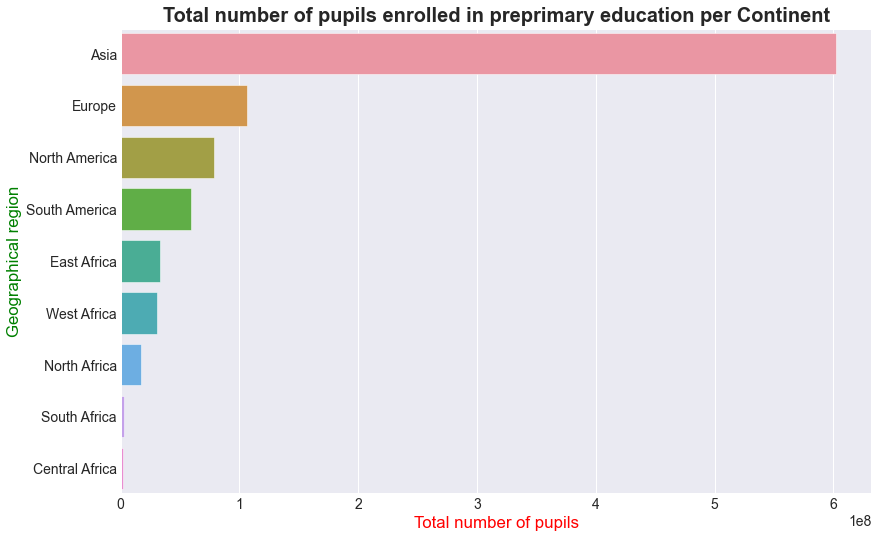

In [109]:
## generate plot

plt.figure(figsize=(12,8))
plot = sb.barplot( x= 'total prepry enrol.', y = 'continent', data = t_larg)
plot.set_xlabel("Total number of pupils", color = "r")
plot.set_ylabel("Geographical region", color = "g")
plot.set_title("Total number of pupils enrolled in preprimary education per Continent", fontdict = {"fontsize": 20,"fontweight":"bold"})
plt.show()

### Inference
#### Asia has the highest number of enrolled preprimary pupils, followed by Europe
#### Central Africa has the least number of pupils enrolled in preprimary education

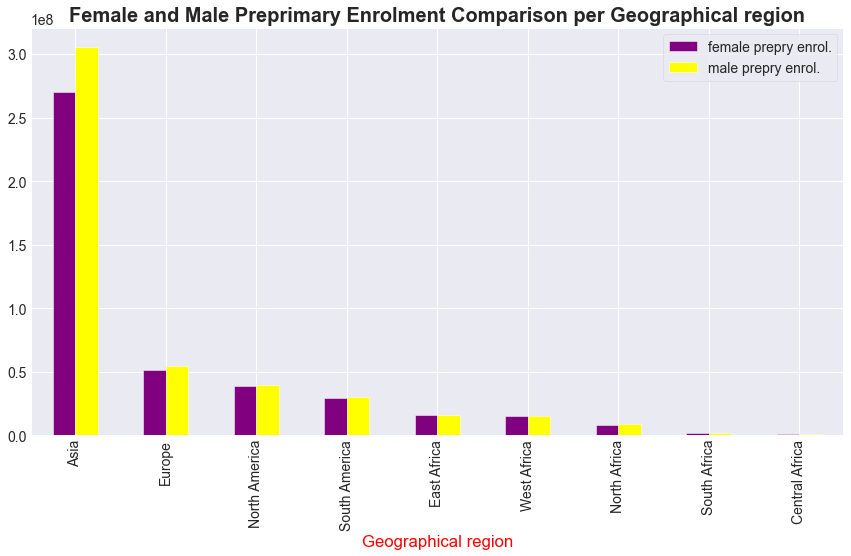

In [110]:
#generate plot comparing male to female frequency in enrolment data

plt.rcParams["figure.figsize"] = (13,7)
plot = t_larg[['continent', 'female prepry enrol.', 'male prepry enrol.']].plot(x='continent', kind='bar', stacked = False, color = ["purple", 'yellow'])
plot.set_xlabel("Geographical region", color = "r")
plot.set_title("Female and Male Preprimary Enrolment Comparison per Geographical region", fontdict = {"fontsize": 20,"fontweight":"bold"})
plt.show()

### Inference
#### This plot shows a common pattern of male pupils being enrolled more in preprimary education than females among continents 

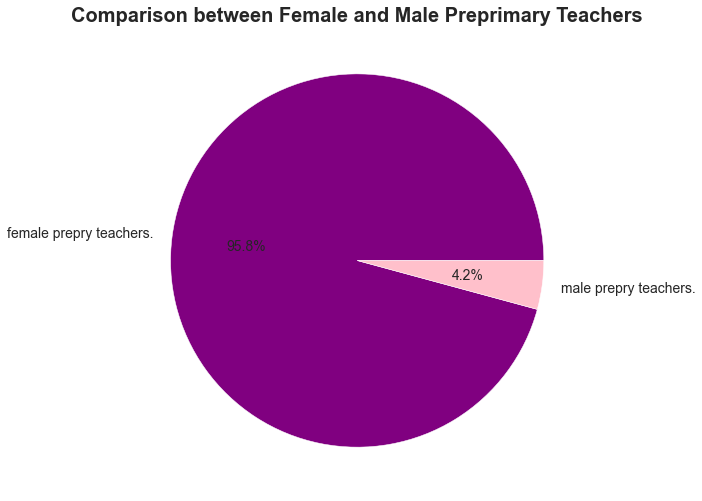

In [111]:
#Aggregate male and female teachers data
m_f_teachers = t_larg.agg({"female prepry teachers.": "sum", "male prepry teachers.": "sum"})

#Create figure object and plot

plt.figure(figsize= (12,8))
plt.pie(m_f_teachers, labels= m_f_teachers.index , autopct='%1.1f%%', colors = ['purple', 'pink'])

#Set plot title

plt.title("Comparison between Female and Male Preprimary Teachers", fontdict = {"fontsize": 20, "fontweight": "bold"})

plt.show()

### Inference
#### Female teachers are significantly higher than male teachers in preprimary education

In [112]:
# create male student enrolment and male teachers data columns in primary dataframe

pry_df.columns

Index(['countries', 'year', 'total pry enrol.', 'female pry enrol.',
       'total pry teachers.', 'female pry teachers.'],
      dtype='object')

In [113]:
pry_df.insert(4, "male pry enrol.", pry_df.apply(lambda x: x[2] - x[3], axis = 1))
pry_df.insert(7, "male pry teachers.", pry_df.apply(lambda x: x[-2] - x[-1], axis = 1))

#call continental grouping fucntion
pry_df["continent"] = grpContinent(countries_dict, pry_df.countries)

In [114]:
pry_df.head()

,countries,year,total pry enrol.,female pry enrol.,male pry enrol.,total pry teachers.,female pry teachers.,male pry teachers.,continent
0,Aruba,2010,9858,4821.0,5037.0,586,493.0,93.0,North America
1,Aruba,2011,9112,4407.0,4705.0,604,512.0,92.0,North America
2,Aruba,2012,8888,4409.0,4479.0,601,508.0,93.0,North America
3,Afghanistan,2010,5279326,2076942.0,3202384.0,118858,36846.0,82012.0,Asia
4,Afghanistan,2011,5291624,2141833.0,3149791.0,121593,37694.0,83899.0,Asia


In [115]:
# create male student enrolment and male teachers data columns in secondary dataframe

sec_df.columns

Index(['countries', 'year', 'total lower sec enrol.',
       'female lower sec enrol.', 'total upper sec enrol.',
       'female upper sec enrol.', 'total lower sec teachers.',
       'female lower sec teachers.', 'total upper sec teachers.',
       'female upper sec teachers.'],
      dtype='object')

In [116]:
#fill null values created from joining

sec_df.fillna(0, inplace = True)

#insert male information into dataframe
sec_df.insert(4, "male lower sec enrol.", sec_df.apply(lambda x: x[2] - x[3], axis = 1))
sec_df.insert(7, "male upper sec enrol.", sec_df.apply(lambda x: x[5] - x[6], axis = 1))
sec_df.insert(10, "male lower sec teachers.", sec_df.apply(lambda x: x[8] - x[9], axis = 1))
sec_df.insert(13, "male upper sec teachers.", sec_df.apply(lambda x: x[11] - x[12], axis = 1))

#call continental grouping data
sec_df["continent"] = grpContinent(countries_dict, sec_df.countries)

In [117]:
sec_df.head()

,countries,year,total lower sec enrol.,female lower sec enrol.,male lower sec enrol.,total upper sec enrol.,female upper sec enrol.,male upper sec enrol.,total lower sec teachers.,female lower sec teachers.,male lower sec teachers.,total upper sec teachers.,female upper sec teachers.,male upper sec teachers.,continent
0,Afghanistan,2015,1669168,596476.0,1072692.0,982291.0,323429.0,658862.0,52359,17368.0,34991.0,30567,10019.0,20548.0,Asia
1,Afghanistan,2016,1740873,624167.0,1116706.0,984548.0,334818.0,649730.0,53490,18370.0,35120.0,31129,10561.0,20568.0,Asia
2,Afghanistan,2017,1867666,668185.0,1199481.0,1031787.0,347607.0,684180.0,55640,19331.0,36309.0,32316,10890.0,21426.0,Asia
3,Afghanistan,2018,1982869,708606.0,1274263.0,1081020.0,367543.0,713477.0,58539,21084.0,37455.0,33600,11745.0,21855.0,Asia
4,Angola,2011,581414,238973.0,342441.0,303568.0,109953.0,193615.0,17475,0.0,17475.0,14804,7114.0,7690.0,South Africa


In [118]:
# create male student enrolment and male teachers data columns in tertiary dataframe

tertiary_df.columns

Index(['countries', 'year', 'total tertiary enrol.', 'female tertiary enrol.',
       'total tertiary teachers.', 'female tertiary teachers.'],
      dtype='object')

In [119]:
#fill null values created from joining
tertiary_df.fillna(0, inplace = True)

#insert male information into dataframe
tertiary_df.insert(4, "male tertiary enrol.", tertiary_df.apply(lambda x: x[2] - x[3], axis = 1))
tertiary_df.insert(7, "male tertiary teachers.", tertiary_df.apply(lambda x: x[5] - x[6], axis = 1))

#call continental grouping data
tertiary_df["continent"] = grpContinent(countries_dict, tertiary_df.countries)

In [120]:
tertiary_df.head()

,countries,year,total tertiary enrol.,female tertiary enrol.,male tertiary enrol.,total tertiary teachers.,female tertiary teachers.,male tertiary teachers.,continent
0,Aruba,2010,2330,1333.0,997.0,224,120.0,104.0,North America
1,Aruba,2011,2504,1453.0,1051.0,228,123.0,105.0,North America
2,Aruba,2012,2621,1523.0,1098.0,265,141.0,124.0,North America
3,Aruba,2013,1181,795.0,386.0,114,61.0,53.0,North America
4,Aruba,2014,1235,842.0,393.0,116,63.0,53.0,North America


## Visualize yearly enrolment trend

In [121]:
# obtain total data columns from primary, secondary and tertiary dataframes

subset_pry = pry_df.iloc[:, [-1, 1, 2]]
subset_sec = sec_df.iloc[:, [-1,1,2,5]]
subset_tert = tertiary_df.iloc[:, [-1, 1, 2]]

In [122]:
# concatenate all total data and groupby continent and year columns
sub_pry_sec = pd.concat([subset_pry, subset_sec]).groupby(["continent", "year"], as_index=False).sum()
tot_sub = pd.concat([sub_pry_sec, subset_tert]).groupby(["continent", "year"], as_index=False).sum()

#convert year column to appropriate datatype
tot_sub.year = pd.to_datetime(tot_sub['year'])
tot_sub.dtypes

continent                         object
year                      datetime64[ns]
total pry enrol.                 float64
total lower sec enrol.           float64
total upper sec enrol.           float64
total tertiary enrol.            float64
dtype: object

In [123]:
tot_sub.tail(10)

,continent,year,total pry enrol.,total lower sec enrol.,total upper sec enrol.,total tertiary enrol.
93,West Africa,2011-01-01,27567748.0,3675282.0,1694143.0,2337655.0
94,West Africa,2012-01-01,26229813.0,2020263.0,1124348.0,927984.0
95,West Africa,2013-01-01,25340148.0,4670207.0,2254794.0,1264999.0
96,West Africa,2014-01-01,29753179.0,3586341.0,1601274.0,1348732.0
97,West Africa,2015-01-01,30482205.0,5189555.0,2366271.0,1016162.0
98,West Africa,2016-01-01,30786646.0,6124063.0,2607141.0,1023358.0
99,West Africa,2017-01-01,29853353.0,4867252.0,1967621.0,778335.0
100,West Africa,2018-01-01,26818511.0,3349048.0,1509183.0,1403225.0
101,West Africa,2019-01-01,30082715.0,3462348.0,1547039.0,1252257.0
102,West Africa,2020-01-01,1634441.0,0.0,0.0,0.0


In [124]:
#melt newly created dataframe and unopivot around year and continent column

melted = pd.melt(tot_sub, id_vars= ['year','continent'], var_name= "Educational level", value_name='Enrolments')

In [125]:
melted.tail()

,year,continent,Educational level,Enrolments
407,2016-01-01,West Africa,total tertiary enrol.,1023358.0
408,2017-01-01,West Africa,total tertiary enrol.,778335.0
409,2018-01-01,West Africa,total tertiary enrol.,1403225.0
410,2019-01-01,West Africa,total tertiary enrol.,1252257.0
411,2020-01-01,West Africa,total tertiary enrol.,0.0


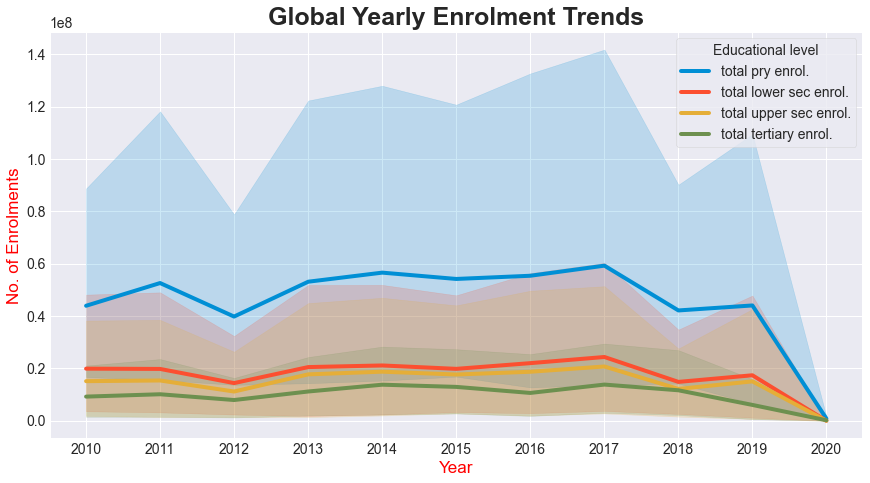

In [126]:
#Create figure object and plot

plt.figure(figsize = (13,7))
melted_plt = sb.lineplot(x='year', y='Enrolments', hue='Educational level', data=melted)

#Set plot title and axes labels
melted_plt.set_title("Global Yearly Enrolment Trends", fontdict= {'fontsize': 25, 'fontweight': 'bold'})
melted_plt.set_xlabel("Year",size =17, color = "r")
melted_plt.set_ylabel("No. of Enrolments",size =17, color = "r")

plt.show()

### Inference
#### This plot shows a reduction in the total number of enrolments as the educational level increases, suggesting a steady pattern of students droping out of school as levels progress

#### Consistent among all educational levels, the highest frequency of enrolled students occured in 2017

# Visualize male-female proportions

## Primary

In [127]:
pry_df.head()

,countries,year,total pry enrol.,female pry enrol.,male pry enrol.,total pry teachers.,female pry teachers.,male pry teachers.,continent
0,Aruba,2010,9858,4821.0,5037.0,586,493.0,93.0,North America
1,Aruba,2011,9112,4407.0,4705.0,604,512.0,92.0,North America
2,Aruba,2012,8888,4409.0,4479.0,601,508.0,93.0,North America
3,Afghanistan,2010,5279326,2076942.0,3202384.0,118858,36846.0,82012.0,Asia
4,Afghanistan,2011,5291624,2141833.0,3149791.0,121593,37694.0,83899.0,Asia


In [128]:
#group primary df data by continent and aggregate the sum of other columns
grpCont2 = pry_df.groupby('continent').agg('sum').reset_index()

#arrange data in descending order
t_larg2 = grpCont2.nlargest(9, 'total pry enrol.')
t_larg2

,continent,total pry enrol.,female pry enrol.,male pry enrol.,total pry teachers.,female pry teachers.,male pry teachers.
0,Asia,3182293487,1.522427e+09,1.659866e+09,146608619,85629996.0,52293587.0
3,East Africa,395161215,1.957332e+08,1.994281e+08,8274790,3924220.0,4286431.0
9,West Africa,298470654,1.403428e+08,1.560592e+08,7611314,2720266.0,4782458.0
6,North America,271386308,1.321651e+08,1.392167e+08,13813038,10576486.0,3236154.0
8,South America,268869178,1.293712e+08,1.394980e+08,12949747,10474965.0,2273679.0
4,Europe,235102981,1.143254e+08,1.207776e+08,17839873,14964563.0,2566242.0
5,North Africa,152880505,7.313271e+07,7.974780e+07,6341366,3828476.0,2512890.0
2,Central Africa,96999563,4.592654e+07,5.107302e+07,2751651,688774.0,1722949.0
7,South Africa,65116789,3.081730e+07,3.429949e+07,1935377,1348536.0,493107.0


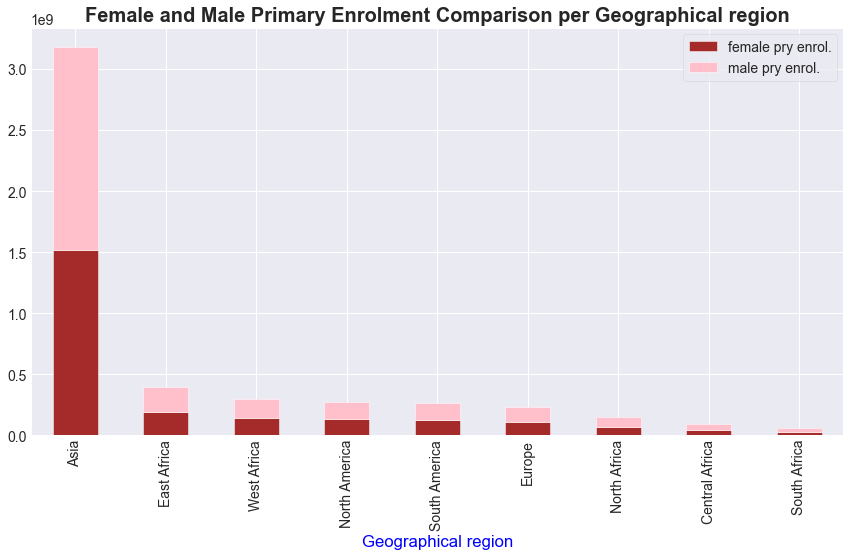

In [129]:
#generate plot comparing male enrolment occurence with female enrolment occurence

plt.rcParams["figure.figsize"] = (13,7)
plot = t_larg2[['continent', 'female pry enrol.', 'male pry enrol.']].plot(x='continent', kind='bar', stacked = True, color = ["brown", 'pink'])
plot.set_xlabel("Geographical region", color = "b")
plot.set_title("Female and Male Primary Enrolment Comparison per Geographical region", fontdict = {"fontsize": 20,"fontweight":"bold"})
plt.show()

### Inference
#### Consistently across all continents and subcontinental groupings, again male pupils are enrolled more in primary education than females


## Secondary

In [130]:
#group secondary df data by continent and aggregate the sum of other columns

grpCont3 = sec_df.groupby('continent').agg('sum').reset_index()
grpCont3

,continent,total lower sec enrol.,female lower sec enrol.,male lower sec enrol.,total upper sec enrol.,female upper sec enrol.,male upper sec enrol.,total lower sec teachers.,female lower sec teachers.,male lower sec teachers.,total upper sec teachers.,female upper sec teachers.,male upper sec teachers.
0,Asia,1412510449,677191315.0,735319134.0,1.230914e+09,578848401.0,652065801.0,78980605,39367800.0,39612805.0,63610929,28508819.0,35102110.0
1,Australia/Oceania,2644352,1258329.0,1386023.0,2.440339e+06,1207764.0,1232575.0,159947,99458.0,60489.0,163924,95009.0,68915.0
2,Central Africa,269757,135993.0,133764.0,1.046090e+05,39380.0,65229.0,13671,1126.0,12545.0,6031,969.0,5062.0
3,East Africa,24413276,11898964.0,12514312.0,5.723549e+06,2640410.0,3083139.0,746690,273643.0,473047.0,567774,186208.0,381566.0
4,Europe,157466140,75969499.0,81496641.0,1.495838e+08,72939655.0,76644177.0,14329310,9692827.0,4636483.0,12805306,7679242.0,5126064.0
5,North Africa,27868472,13341243.0,14527229.0,1.934327e+07,9285606.0,10057664.0,1567739,776317.0,791422.0,1519370,624252.0,895118.0
6,North America,83262785,41106376.0,42156409.0,6.491875e+07,32562354.0,32356395.0,5299045,3235018.0,2064027.0,4600943,2503282.0,2097661.0
7,South Africa,2262721,894040.0,1368681.0,8.117640e+05,339094.0,472670.0,76711,20054.0,56657.0,42908,15255.0,27653.0
8,South America,171378774,84125204.0,87253570.0,1.153417e+08,60747097.0,54594647.0,8944012,5967204.0,2976808.0,7032946,4083517.0,2949429.0
9,West Africa,42566375,19448313.0,23118062.0,2.090530e+07,9076066.0,11829235.0,2092757,504507.0,1588250.0,1209818,299642.0,910176.0


In [131]:
#melt male and female data and unpivot around continent column
melted2 = pd.melt(grpCont3, id_vars= ['continent'], value_vars= ["female lower sec enrol.", 'male lower sec enrol.',"female upper sec enrol.", 'male upper sec enrol.' ''], var_name= "Educational level", value_name='Enrolments')

In [132]:
melted2['continent'].unique()

array(['Asia', 'Australia/Oceania', 'Central Africa', 'East Africa',
       'Europe', 'North Africa', 'North America', 'South Africa',
       'South America', 'West Africa'], dtype=object)

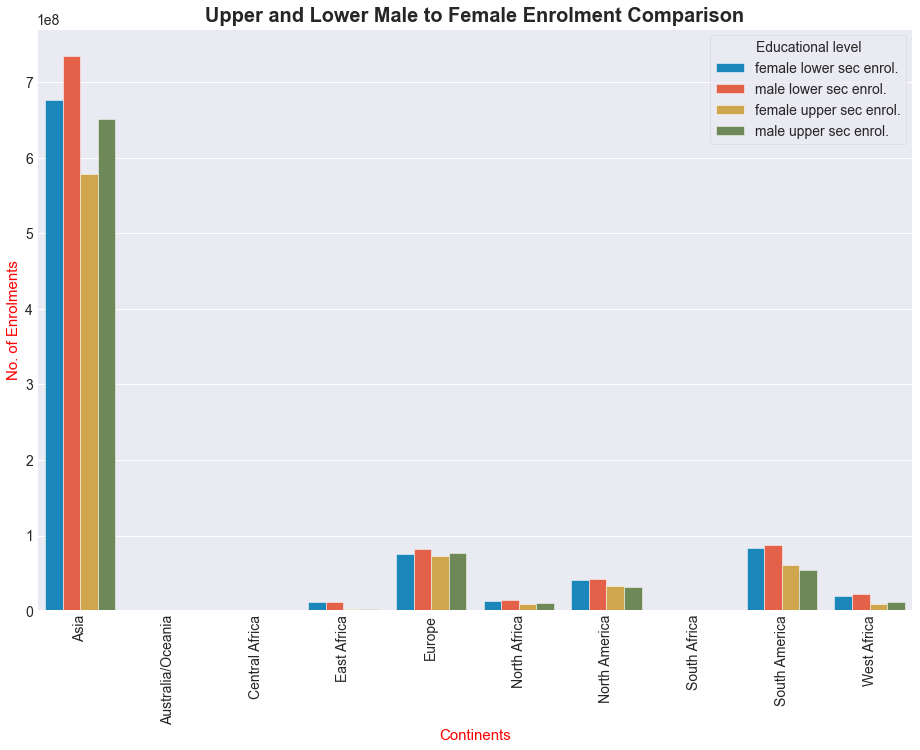

In [133]:
#generate bar plot

plt.figure(figsize = (14,10))
sec_plot = sb.barplot(x = "continent", y = "Enrolments", hue= "Educational level", data = melted2)
sec_plot.set_title("Upper and Lower Male to Female Enrolment Comparison", fontdict = {"fontsize": 20, "fontweight": "bold"})
sec_plot.set_xlabel("Continents", size = 15, color= "r")
sec_plot.set_ylabel("No. of Enrolments", size = 15, color= "r")
plt.xticks(rotation=90)


plt.show()

### Inference
#### The general pattern of having more male student enrolments than female enrolments is consistent with this plot however, in North and South America, females enrolment in upper secondary education is more than male enrolment, suggesting that more males drop out of education at the upper secondary level

## Tertiary

In [134]:
#group tertiary df data by continent and aggregate the sum of other columns

grpCont4 = tertiary_df.groupby('continent').agg('sum').reset_index()

#arrange data in descending order
t_larg4 = grpCont4.nlargest(9, 'total tertiary enrol.')
t_larg4

,continent,total tertiary enrol.,female tertiary enrol.,male tertiary enrol.,total tertiary teachers.,female tertiary teachers.,male tertiary teachers.
0,Asia,643564367,311359147.0,332205220.0,34319794,12884342.0,21435452.0
4,Europe,171469379,92715031.0,78754348.0,13035286,4757668.0,8277618.0
6,North America,110005681,60269238.0,49736443.0,10176750,3575453.0,6601297.0
8,South America,89189620,49427992.0,39761628.0,4891541,2050756.0,2840785.0
5,North Africa,30377729,16404223.0,13973506.0,1140669,460040.0,680629.0
9,West Africa,13451215,5167510.0,8283705.0,614746,95199.0,519547.0
3,East Africa,6110355,2555456.0,3554899.0,288405,73346.0,215059.0
1,Australia/Oceania,1606470,920791.0,685679.0,97294,47707.0,49587.0
2,Central Africa,1113824,355769.0,758055.0,66828,4879.0,61949.0


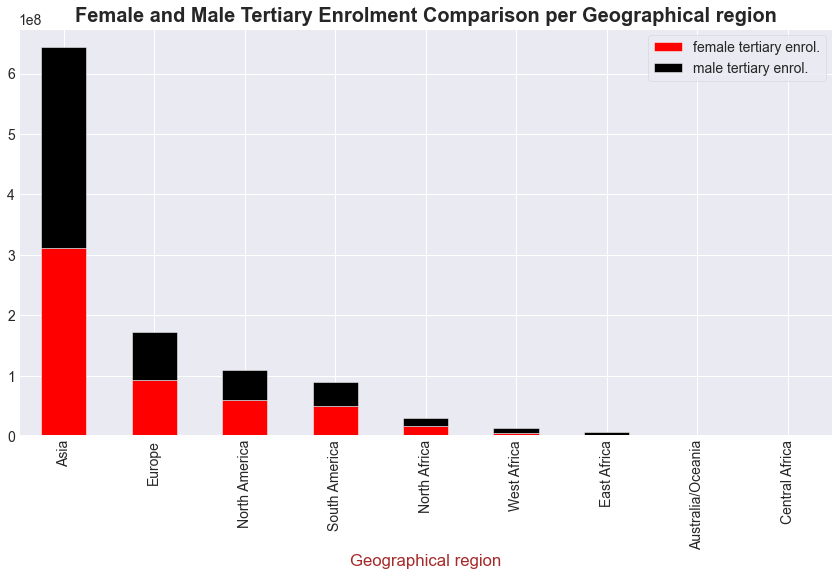

In [135]:
#generate stacked bar chat

plt.rcParams["figure.figsize"] = (13,7)
plot = t_larg4[['continent', 'female tertiary enrol.', 'male tertiary enrol.']].plot(x='continent', kind='bar', stacked = True, color = ["red", 'black'])
plot.set_xlabel("Geographical region", color = "brown")
plot.set_title("Female and Male Tertiary Enrolment Comparison per Geographical region", fontdict = {"fontsize": 20,"fontweight":"bold"})
plt.show()

### Inference
#### In Europe, North America, South America and North Africa, female enrolment in tertiary education is significantly higher than male enrolment, supporting the inference from the previous plot of female upper secondary education in South America and North America